In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import zipfile


zip_path = r"D:\FracAtlas.zip" #r is for raw string to avoid escape sequences

# Step 2: Where to extract
extract_to = r"D:\FracAtlas_extracted"

# Step 3: Extract all files if not already extracted
if not os.path.exists(extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print("✅ Files extracted to:", extract_to)
else:
    print("⚠️ Files already extracted at:", extract_to)


⚠️ Files already extracted at: D:\FracAtlas_extracted


In [15]:
import os, cv2, json
import numpy as np
import matplotlib.pyplot as plt

# Paths
json_path = r"D:\FracAtlas_extracted\FracAtlas\Annotations\COCO JSON\COCO_fracture_masks.json"
image_dir = r"D:\FracAtlas_extracted\FracAtlas\images\Fractured"

print("JSON Path:", json_path)
print("Image Directory:", image_dir)


JSON Path: D:\FracAtlas_extracted\FracAtlas\Annotations\COCO JSON\COCO_fracture_masks.json
Image Directory: D:\FracAtlas_extracted\FracAtlas\images\Fractured


In [16]:
with open(json_path, "r") as f:
    coco_data = json.load(f)

print("JSON loaded successfully")
print("Total Images:", len(coco_data["images"]))
print("Total Annotations:", len(coco_data["annotations"]))
print("Categories:", coco_data["categories"])


JSON loaded successfully
Total Images: 717
Total Annotations: 922
Categories: [{'id': 0, 'name': 'fractured'}]


Image Info: {'id': 1, 'width': 2304, 'height': 2880, 'file_name': 'IMG0000019.jpg'}
Image Path: D:\FracAtlas_extracted\FracAtlas\images\Fractured\IMG0000019.jpg
Image loaded. Shape: (2880, 2304)
Found 1 annotations for IMG0000019.jpg
Example Annotation: {'id': 0, 'iscrowd': 0, 'image_id': 1, 'category_id': 0, 'segmentation': [[1266.0594059405942, 1045.5445544554457, 1339.7227722772277, 1021.782178217822, 1401.5049504950496, 1052.673267326733, 1489.4257425742576, 1076.4356435643565, 1515.5643564356437, 1021.782178217822, 1449.0297029702972, 943.3663366336635, 1308.8316831683169, 929.1089108910893, 1242.2970297029703, 986.1386138613863]], 'bbox': [1242.2970297029703, 929.1089108910893, 273.2673267326734, 147.3267326732672], 'area': 25033.78100186259}
Segmentation Points (first 5): [[1266.05940594 1045.54455446]
 [1339.72277228 1021.78217822]
 [1401.5049505  1052.67326733]
 [1489.42574257 1076.43564356]
 [1515.56435644 1021.78217822]]
Bounding Box: 1242.2970297029703 929.1089108910893 273

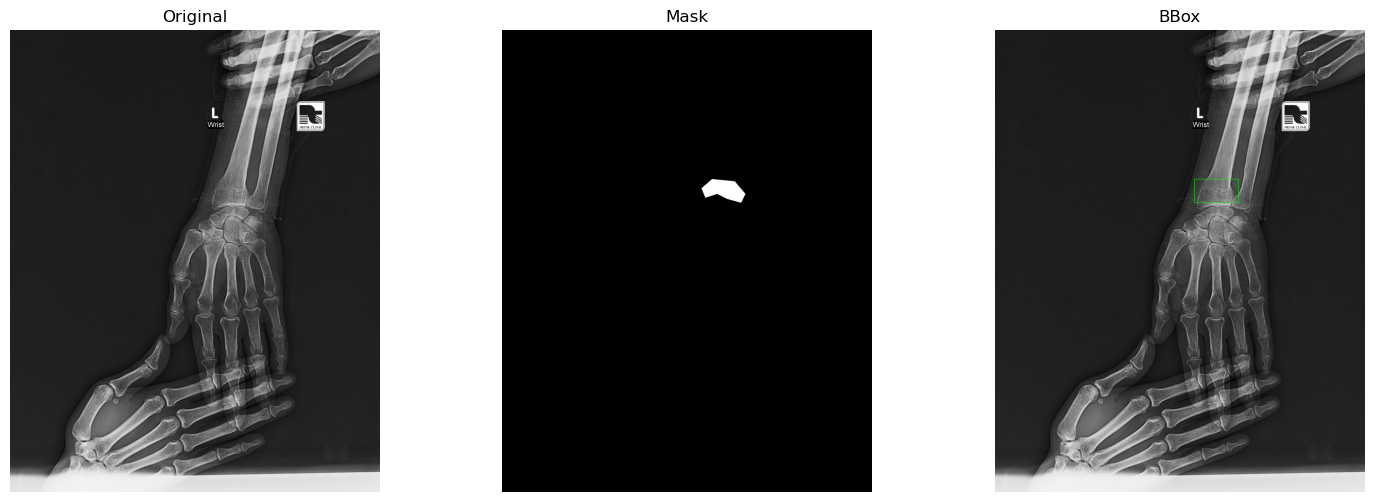

In [17]:
# Take first image info
image_info = coco_data["images"][0]
print("Image Info:", image_info)

# Build full path
image_path = os.path.join(image_dir, image_info["file_name"])
print("Image Path:", image_path)

# Load image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Could not load image.")
else:
    print("Image loaded. Shape:", image.shape)
    
def get_annotations(image_id, coco_data):
    return [ann for ann in coco_data["annotations"] if ann["image_id"] == image_id]

annotations = get_annotations(image_info["id"], coco_data)
print(f"Found {len(annotations)} annotations for {image_info['file_name']}")

if len(annotations) > 0:
    print("Example Annotation:", annotations[0])
    
    
image_with_bbox = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
mask_total = np.zeros(image.shape, dtype=np.uint8)

for ann in annotations:
    # --- Segmentation ---
    segmentation = np.array(ann["segmentation"][0]).reshape(-1, 2)
    print("Segmentation Points (first 5):", segmentation[:5])
    polygon_points = np.array(segmentation, dtype=np.int32)
    cv2.fillPoly(mask_total, [polygon_points], color=255)

    # --- Bounding Box ---
    x, y, w, h = ann["bbox"]
    print("Bounding Box:", x, y, w, h)
    x1, y1, x2, y2 = int(x), int(y), int(x+w), int(y+h)
    cv2.rectangle(image_with_bbox, (x1, y1), (x2, y2), (0,255,0), 2)


overlay = cv2.addWeighted(image, 0.7, mask_total, 0.3, 0)

plt.figure(figsize=(18,6))
plt.subplot(1,3,1); plt.imshow(image, cmap="gray"); plt.title("Original"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(mask_total, cmap="gray"); plt.title("Mask"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(image_with_bbox); plt.title("BBox"); plt.axis("off")
plt.show()



In [ ]:
# loop to load and process each image


In [ ]:
#json_path: string variable holdingn the path of COCO JSON annotation
json_path = r"D:\FracAtlas_extracted\FracAtlas\Annotations\COCO JSON\COCO_fracture_masks.json"
images_dir = r"D:\FracAtlas_extracted\FracAtlas\images\Fractured"


with open(json_path, "r") as f:
    coco_data = json.load(f)

print("JSON loaded. Total images in JSON:", len(coco_data["images"]))

# --- Loop through first 5 images ---
for idx, image_info in enumerate(coco_data["images"][:5]):
    print("\n Processing image", idx+1)

    # Step 1: Build image path
    file_name = image_info["file_name"]  # it gets the image from JSON...e.g., IMG0000777.jpg
    image_path = os.path.join(images_dir, file_name) #joins folder path (images_dir) + file name into full path
    #image_path: joins folder path like D:\FracAtlas_extracted\FracAtlas\images\Fractured\IMG0000777.jpg

    print("Image path:", image_path)

    # Step 2: Load grayscale image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # image is now a NumPy array of shape (h, w) containing pixel intensities (0-255)
    
    if image is None: #condition checks if image couldn't be loaded
        print("Could not load image:", image_path)
        continue #if failed continue skips the iteration and moves to next image
    print("Image loaded. Shape:", image.shape) #prints height, width of the image

    # Step 3: Get annotations for this image
    image_id = image_info["id"] #unique id of this image from JSON
    
    #annotations: filters all annotations objects that belong to this image
    annotations = [ann for ann in coco_data["annotations"] if ann["image_id"] == image_id]
    print("Found", len(annotations), "annotations for this image")
    #image id = unique ID of this image from JSON
    #annotations: filters all annotations objects that belong to this image
    
    # Step 4: Prepare copies for drawing
    mask_total = np.zeros(image.shape, dtype=np.uint8)
    #mask total = creates a blank black mask(same size as image)
    
    #converts grayscale image to BGR(3-channel) so we can draw colored bounding boxes
    image_with_bbox = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    #loops over each annotation for this image
    #segmentation: 
    # - ann['segmentation'][0] gives  list of polygon points
    # - converted to numpy array, reshaped into pairs of (x,y)
    # - example: [100,120, 150, 130, 160, 140] -> [(100, 120), (150, 130), (160, 140)]
    for ann in annotations:
        segmentation = np.array(ann["segmentation"][0]).reshape(-1, 2).astype(np.int32)
        bbox = ann["bbox"]  #bbox: bounding info -> [x,y,w,h]

        # Draw mask
        cv2.fillPoly(mask_total, [segmentation], 255) 
        #draws filled polygon for the fracture area onto the mask_total
        #polygon pixels set to 255(white)
        
        
        # Draw bounding box
        x, y, w, h = bbox
        
        #draws bbox on the image
        cv2.rectangle(image_with_bbox,
                      (int(x), int(y)), #top left corner
                      (int(x + w), int(y + h)),  #bottom right corner
                      (0, 255, 0), 4) # cv2 rectangle color in BGR format
                       # (0, 255, 0) is green in BGR format
                       # 4 is the line thickness of the rectangle

    # Step 5: Show results
    #creates a figure of w 12 and height 4 for side by side plots
    
    plt.figure(figsize=(12, 4))
    
    #first subplot-> shows original grayscale image
    plt.subplot(1, 3, 1);  plt.imshow(image, cmap="gray")
    plt.title("Original Image"); plt.axis("off")
    #second subplot -> binary  mask
    plt.subplot(1, 3, 2);  plt.imshow(mask_total, cmap="gray")
    plt.title("Mask (Fracture Area)"); plt.axis("off")
    #third subplot -> shows image with bounding box drawn
    plt.subplot(1, 3, 3); plt.imshow(image_with_bbox)
    plt.title("Bounding Box on Image"); plt.axis("off")
    plt.show() #displays all three plots for current image

NameError: name 'json' is not defined

In [1]:
#updated code for adding intensity of image, overlay and saving masked images in a folder

In [3]:
####################

In [14]:
import os, cv2, json
import numpy as np
import matplotlib.pyplot as plt
import zipfile

# --- Step 1: Define paths ---
json_path = r"D:\FracAtlas_extracted\FracAtlas\Annotations\COCO JSON\COCO_fracture_masks.json"
image_dir = r"D:\FracAtlas_extracted\FracAtlas\images\Fractured"

In [15]:
# --- Step 2: Load COCO JSON annotations ---
with open(json_path, "r") as f:
    coco_data = json.load(f)
print("✅ JSON loaded successfully")
print("Total Images:", len(coco_data["images"]))
print("Total Annotations:", len(coco_data["annotations"]))
print("Categories:", coco_data["categories"])

✅ JSON loaded successfully
Total Images: 717
Total Annotations: 922
Categories: [{'id': 0, 'name': 'fractured'}]


In [16]:
# --- Step 3: Function to fetch all annotations for an image ---
def get_annotations(image_id, coco_data):
    return [ann for ann in coco_data["annotations"] if ann["image_id"] == image_id]


In [17]:
# --- Step 4: Create output folder for saving masks ---
mask_dir = os.path.join(image_dir, "Masks")  # new folder "Masks" inside image_dir
os.makedirs(mask_dir, exist_ok=True)

✅ JSON loaded successfully
Total Images: 717
Total Annotations: 922
[1] IMG0000019.jpg -> Image (Min=0, Max=255), Mask (Min=0, Max=255)


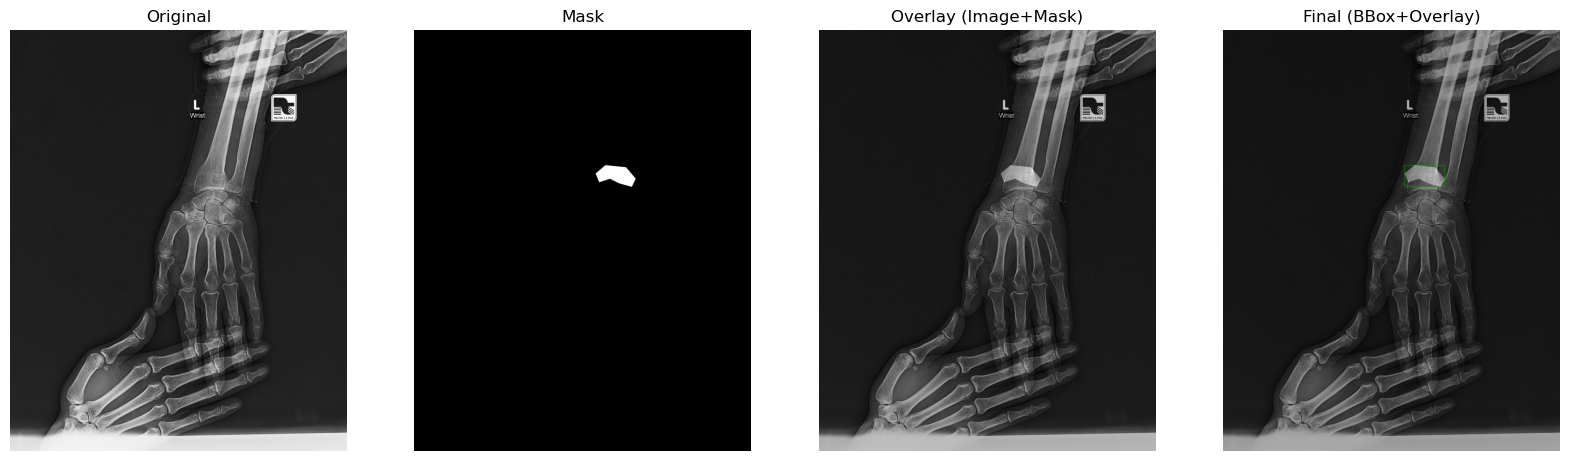

[2] IMG0000025.jpg -> Image (Min=0, Max=254), Mask (Min=0, Max=255)


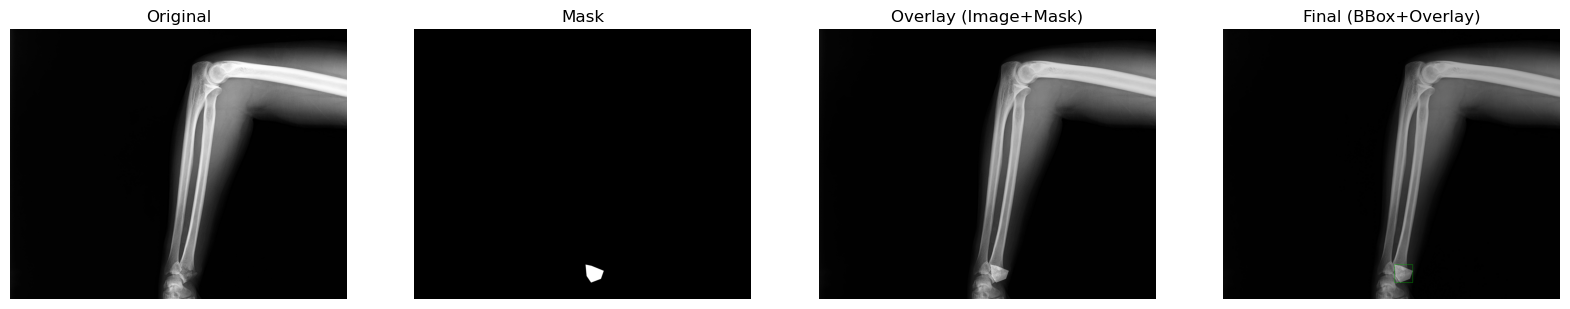

[3] IMG0000044.jpg -> Image (Min=0, Max=255), Mask (Min=0, Max=255)


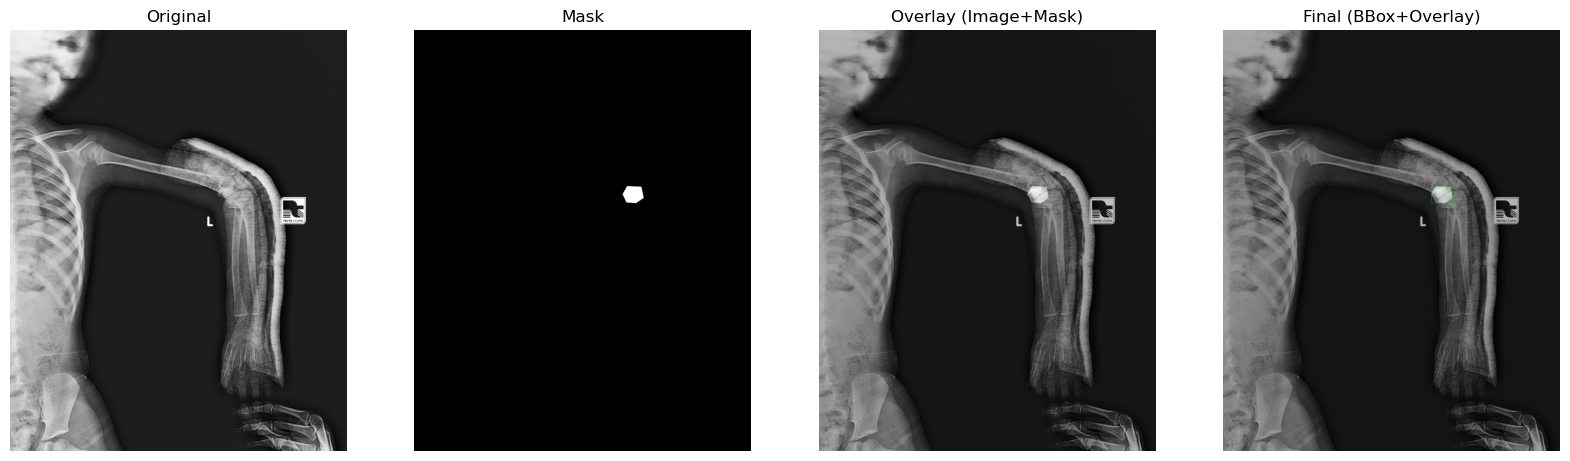

[4] IMG0000057.jpg -> Image (Min=0, Max=255), Mask (Min=0, Max=255)


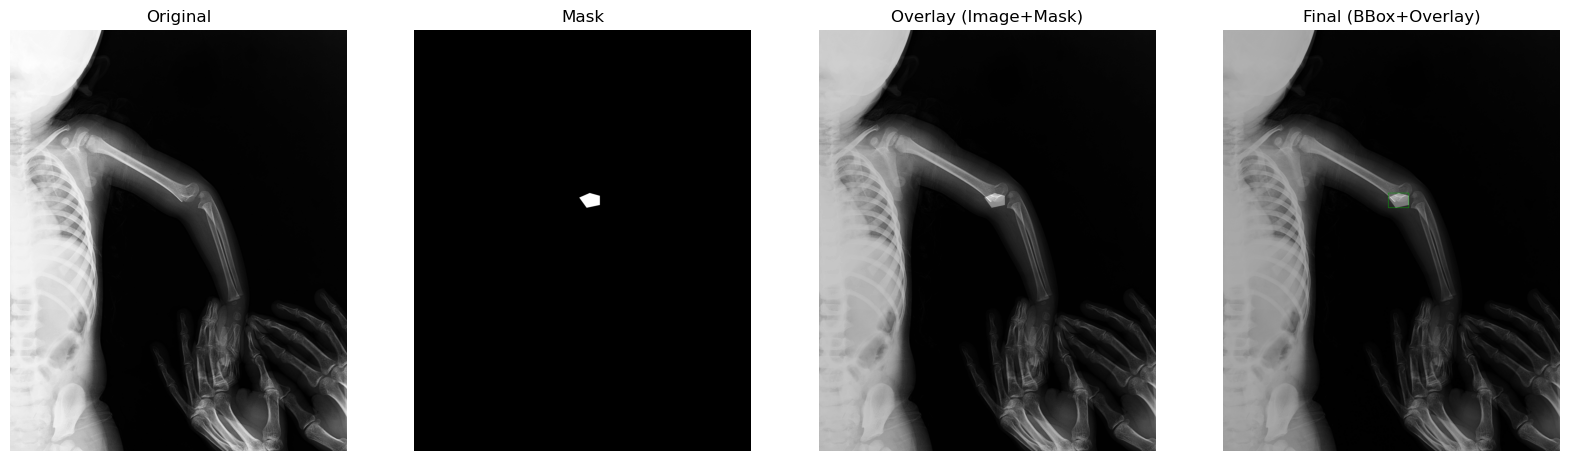

[5] IMG0000058.jpg -> Image (Min=0, Max=255), Mask (Min=0, Max=255)


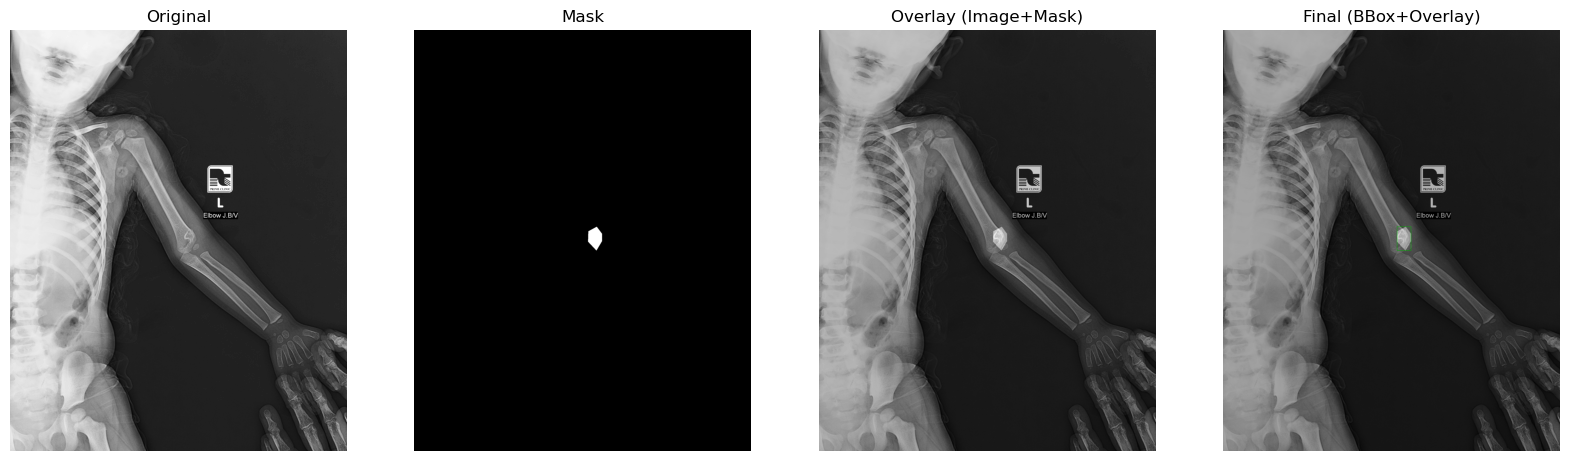

[6] IMG0000059.jpg -> Image (Min=0, Max=255), Mask (Min=0, Max=255)
[7] IMG0000092.jpg -> Image (Min=0, Max=255), Mask (Min=0, Max=255)
[8] IMG0000100.jpg -> Image (Min=0, Max=255), Mask (Min=0, Max=255)
[9] IMG0000142.jpg -> Image (Min=0, Max=255), Mask (Min=0, Max=255)
[10] IMG0000143.jpg -> Image (Min=0, Max=255), Mask (Min=0, Max=255)
[11] IMG0000144.jpg -> Image (Min=0, Max=255), Mask (Min=0, Max=255)
[12] IMG0000151.jpg -> Image (Min=0, Max=255), Mask (Min=0, Max=255)
[13] IMG0000155.jpg -> Image (Min=0, Max=255), Mask (Min=0, Max=255)
[14] IMG0000156.jpg -> Image (Min=0, Max=255), Mask (Min=0, Max=255)
[15] IMG0000188.jpg -> Image (Min=0, Max=255), Mask (Min=0, Max=255)
[16] IMG0000189.jpg -> Image (Min=0, Max=255), Mask (Min=0, Max=255)
[17] IMG0000190.jpg -> Image (Min=0, Max=255), Mask (Min=0, Max=255)
[18] IMG0000206.jpg -> Image (Min=0, Max=255), Mask (Min=0, Max=255)
[19] IMG0000207.jpg -> Image (Min=0, Max=255), Mask (Min=0, Max=255)
[20] IMG0000261.jpg -> Image (Min=0, M

In [23]:
import os, cv2, json
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Define paths ---
json_path = r"D:\FracAtlas_extracted\FracAtlas\Annotations\COCO JSON\COCO_fracture_masks.json"
image_dir = r"D:\FracAtlas_extracted\FracAtlas\images\Fractured"

# --- Step 2: Load COCO JSON annotations ---
with open(json_path, "r") as f:
    coco_data = json.load(f)
print("✅ JSON loaded successfully")
print("Total Images:", len(coco_data["images"]))
print("Total Annotations:", len(coco_data["annotations"]))

# --- Step 3: Function to fetch all annotations for an image ---
def get_annotations(image_id, coco_data):
    return [ann for ann in coco_data["annotations"] if ann["image_id"] == image_id]

# --- Step 4: Create output folders for saving masks & overlays ---
mask_dir = os.path.join(image_dir, "Masks")
overlay_dir = os.path.join(image_dir, "Overlays")
os.makedirs(mask_dir, exist_ok=True)
os.makedirs(overlay_dir, exist_ok=True)

# --- Step 5: Loop over all images ---
for idx, image_info in enumerate(coco_data["images"]):
    image_path = os.path.join(image_dir, image_info["file_name"])
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"❌ Skipping {image_info['file_name']} (could not load)")
        continue

    annotations = get_annotations(image_info["id"], coco_data)
    if len(annotations) == 0:
        print(f"⚠️ No annotations for {image_info['file_name']}, skipping mask/overlay")
        continue

    # --- Create empty mask ---
    mask_total = np.zeros(image.shape, dtype=np.uint8)
    image_with_bbox = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # for bbox

    # --- Draw polygons & bounding boxes ---
    for ann in annotations:
        if "segmentation" in ann and len(ann["segmentation"]) > 0:
            segmentation = np.array(ann["segmentation"][0]).reshape(-1, 2)
            polygon_points = np.array(segmentation, dtype=np.int32)
            cv2.fillPoly(mask_total, [polygon_points], color=255)

            # bounding box
            x, y, w, h = ann["bbox"]
            x1, y1, x2, y2 = int(x), int(y), int(x+w), int(y+h)
            cv2.rectangle(image_with_bbox, (x1, y1), (x2, y2), (0,255,0), 2)

    # --- Save mask ---
    mask_filename = os.path.splitext(image_info["file_name"])[0] + "_mask.png"
    mask_path = os.path.join(mask_dir, mask_filename)
    cv2.imwrite(mask_path, mask_total)

    # --- Save overlay (image + mask) ---
    overlay = cv2.addWeighted(image, 0.7, mask_total, 0.3, 0)
    overlay_filename = os.path.splitext(image_info["file_name"])[0] + "_overlay.png"
    overlay_path = os.path.join(overlay_dir, overlay_filename)
    cv2.imwrite(overlay_path, overlay)

    # --- Print intensity values ---
    min_img, max_img = image.min(), image.max()
    min_mask, max_mask = mask_total.min(), mask_total.max()
    print(f"[{idx+1}] {image_info['file_name']} -> "
          f"Image (Min={min_img}, Max={max_img}), Mask (Min={min_mask}, Max={max_mask})")

    # --- Plot only first 5 images ---
    if idx < 5:
        plt.figure(figsize=(20,6))
        plt.subplot(1,4,1)
        plt.imshow(image, cmap="gray")
        plt.title("Original")
        plt.axis("off")

        plt.subplot(1,4,2)
        plt.imshow(mask_total, cmap="gray")
        plt.title("Mask")
        plt.axis("off")

        plt.subplot(1,4,3)
        plt.imshow(overlay, cmap="gray")
        plt.title("Overlay (Image+Mask)")
        plt.axis("off")

        plt.subplot(1,4,4)
        final_view = cv2.addWeighted(image_with_bbox, 0.7, 
                                     cv2.cvtColor(mask_total, cv2.COLOR_GRAY2BGR), 0.3, 0)
        plt.imshow(final_view)
        plt.title("Final (BBox+Overlay)")
        plt.axis("off")
        plt.show()

print("🎉 Done! Masks saved in:", mask_dir)
print("🎉 Done! Overlays saved in:", overlay_dir)


In [ ]:
# --- Save mask ---
  